## Logistic regression on the MNIST dataset

We will use logistic regression to classify handwritten digits.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)

In [2]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [3]:
mnist.target.size

70000

In [4]:
# save the input data with the variable name 'X'
X=mnist.data
# save the output data with the variable name 'y'
y=mnist.target

In [5]:
# Define `A` to be the second row of `X` and convert `A` to a NUmpy array
A=X.iloc[2].to_numpy()

In [6]:
# Reshape `A` to have shape `(28,28)`
A=A.reshape(28,28)
A.shape

(28, 28)

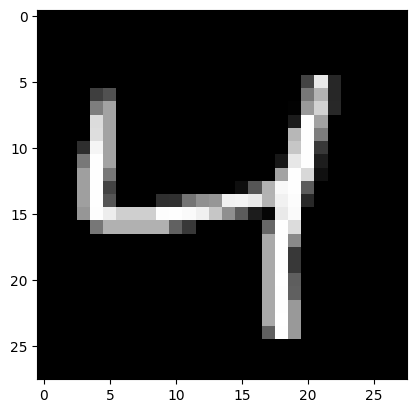

In [7]:
# Displaye the image in black-and-white.
fig, ax=plt.subplots()
ax.imshow(A, cmap="binary_r")

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
# We define the tolerance to be 0.1
clf=LogisticRegression(tol=0.1, solver='sag')

In [12]:
# Fit a logistic regression model using the training data
clf.fit(X_train, y_train)

LogisticRegression(solver='sag', tol=0.1)

In [13]:
clf.score(X_train, y_train)

0.9308035714285714

In [14]:
clf.score(X_test, y_test)

0.9215714285714286

In [15]:
clf.score(X_test, y_test)-clf.score(X_train, y_train)

-0.0092321428571428

Since the test accuracy is not higher than the training accuracy but their difference is within 1%, overfitting is not a concern in this case.

In [16]:
import pandas as pd

In [17]:
df=pd.DataFrame({"Digit":y_test, "Pred": clf.predict(X_test)})

In [18]:
df.shape

(14000, 2)

In [19]:
import altair as alt

Make the confusion matrix for this data

In [20]:
alt.data_transformers.enable('default', max_rows=15000)

DataTransformerRegistry.enable('default')

In [21]:
c = alt.Chart(df).mark_rect().encode(
    x="Digit",
    y="Pred",
    color=alt.Color('count()', scale=alt.Scale(scheme='turbo'))
)

In [22]:
c_text = alt.Chart(df).mark_text(color="white").encode(
    x="Digit",
    y="Pred",
    text="count()"
)

In [23]:
(c+c_text).properties(
    height=400,
    width=400
)

alt.LayerChart(...)

In [24]:
for a,b in df.groupby("Digit"):
    if a==9:
        break

display(b["Pred"].value_counts())

9    1302
4      42
7      31
3      11
5      11
8       8
1       7
2       6
0       6
Name: Pred, dtype: int64

In [25]:
b["Pred"]

31798    9
54677    9
34591    7
61322    9
1507     9
        ..
7474     9
26005    9
23816    9
28007    9
50973    9
Name: Pred, Length: 1424, dtype: object

The code shows the predicted digit of 9. The left column is the predicted digit and the right column is the times of the predicted digit that it is shown. The result is the same as the numbers that are shown in each rectangle and represents the same meaning of the text that the easiest mistake of the predicted number is 4 and 7.

Example of an incorrectly classified digit

In [26]:
df

,Digit,Pred
60570,5,5
31798,9,9
33407,3,3
6015,7,7
28339,6,6
...,...,...
5307,2,4
44313,0,0
50973,9,9
51391,8,8


In [27]:
for x in df.index:
    if df.loc[x,"Digit"]!=df.loc[x,"Pred"]:
        print(x)
        break

14045


In [29]:
C=X.iloc[52004].to_numpy()

In [30]:
C=C.reshape(28,28)

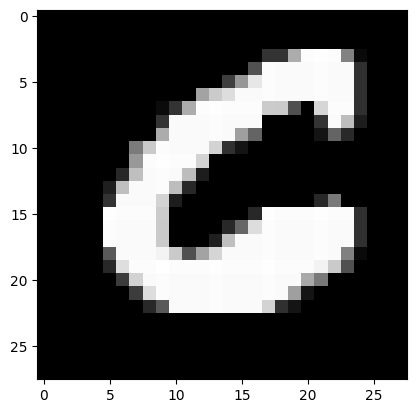

In [31]:
fig, ax=plt.subplots()
ax.imshow(C, cmap="binary_r")

The mistake is not that reasonable since the image is not look like 5. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=834e360d-226b-4732-ab35-cc2ce735e2d0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>